In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,recall_score, f1_score


In [147]:
df=pd.read_excel('/content/iris (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
df.shape

(150, 5)

In [149]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Fill in all the missing values present in all the columns in the dataset**

In [151]:
df.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


Text(0, 0.5, 'Classification')

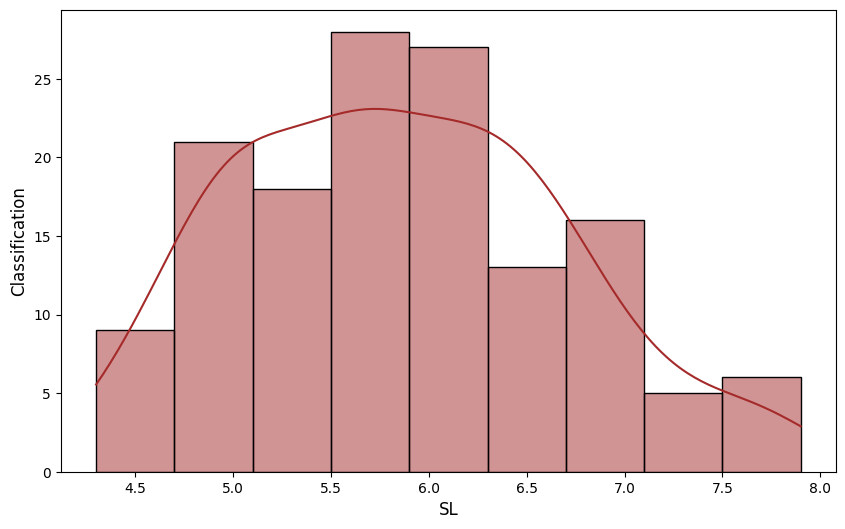

In [152]:
plt.figure(figsize=(10,6))
sns.histplot(df['SL'], kde=True, color='brown')
plt.xlabel('SL', fontsize=12)
plt.ylabel('Classification', fontsize=12)

In [153]:
# remove missing values of Sepal Length
df['SL'] = df['SL'].fillna(df['SL'].mean())

Text(0, 0.5, 'Classification')

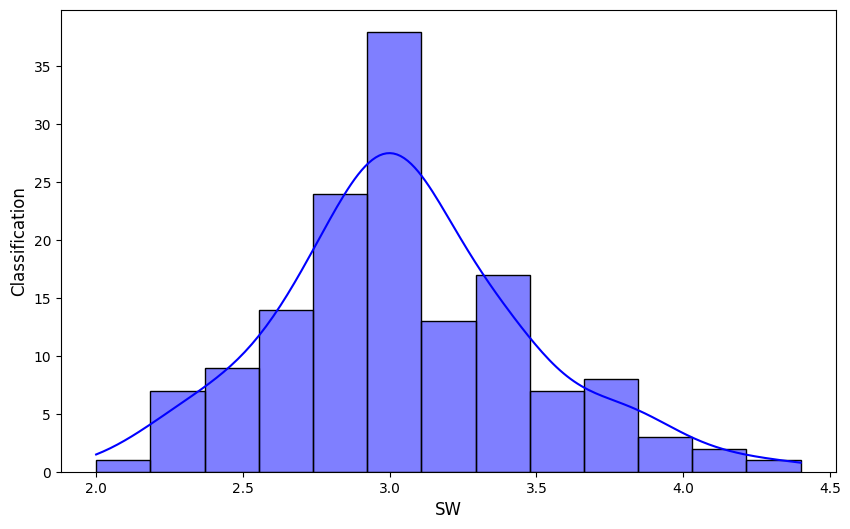

In [154]:
plt.figure(figsize=(10,6))
sns.histplot(df['SW'], kde=True,color='blue')
plt.xlabel('SW', fontsize=12)
plt.ylabel('Classification', fontsize=12)

In [155]:
# remove missing values of Sepal Width
df['SW'] = df['SW'].fillna(df['SW'].median())

Text(0, 0.5, 'Classification')

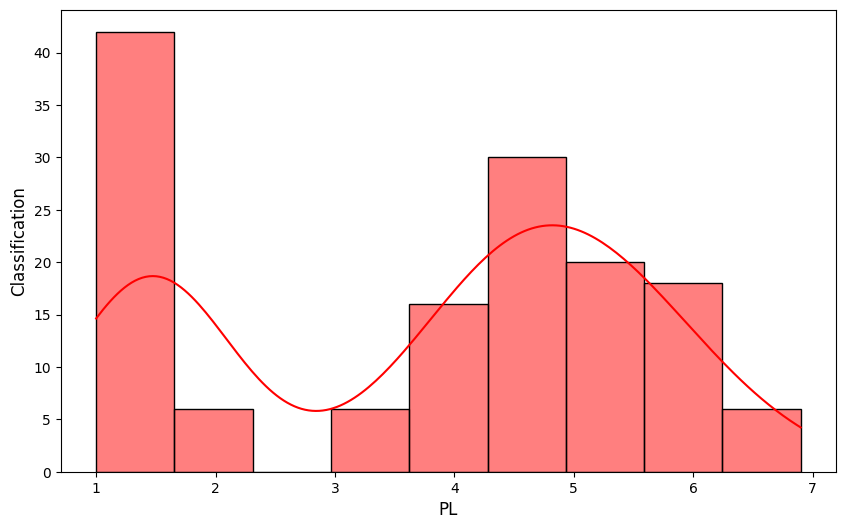

In [156]:
plt.figure(figsize=(10,6))
sns.histplot(df['PL'], kde=True, color='Red')
plt.xlabel('PL', fontsize=12)
plt.ylabel('Classification', fontsize=12)

In [157]:
# Removing Missing values of Petal Length
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [158]:
df.isna().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


**Check outliers**

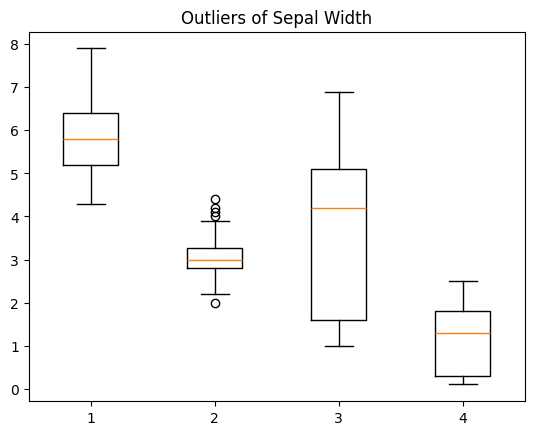

In [180]:
plt.boxplot(df[['SL','SW','PL','PW']])
plt.title('Outliers of Sepal Width')
plt.show()

# It shows that SW has Outliers

In [164]:
# Feauture Selection
X = df.drop(columns=["Classification"])
y = df["Classification"]

In [165]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y=lr.fit_transform(y)

In [166]:
# Scaling Feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [167]:
# spilting  data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#  Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [169]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


# Naive Bayes

In [170]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)

In [171]:
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print('Accuracy:', accuracy_score(y_test, y_pred_nb))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


# Support Vector Machine [SVM]

In [172]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [173]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


# K-Nearest Neighbors [KNN]

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [175]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


# Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [177]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [179]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


 **Naive Bayes, Decision Tree and Random Forest classification model gives best result**

In [182]:
print('Logistic Regression:', accuracy_score(y_test, y_pred))
print('Naive Bayes:', accuracy_score(y_test, y_pred_nb))
print('SVM:', accuracy_score(y_test, y_pred_svm))
print('KNN:', accuracy_score(y_test, y_pred_knn))
print('Decision Tree:', accuracy_score(y_test, y_pred_dt))
print('Random Forest:', accuracy_score(y_test, y_pred_rf))

Logistic Regression: 0.9666666666666667
Naive Bayes: 1.0
SVM: 0.9666666666666667
KNN: 0.9666666666666667
Decision Tree: 1.0
Random Forest: 1.0
